<a href="https://colab.research.google.com/github/jan-podlipny/PCA/blob/master/check_properties_of_inner_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

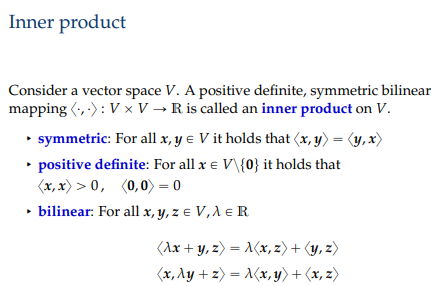

In [1]:
import torch

In [28]:
class Properties_of_inner_product:
  def __init__(self, matrix):
    self.A = matrix
    self.x = torch.randint(-500, 500, (2,))
    self.y = torch.randint(-500, 500, (2,))
    self.z = torch.randint(-500, 500, (2,))
    self.l = torch.randint(low=0,high=500,size=(1,)).item()


    self.is_pd = None
    self.is_bi = None
    self.is_symm = None

  def __str__(self): 
    return f'{self.A}'

  def inner_product(self,x,y,A):
    return torch.matmul(torch.matmul(x.t(), A),y)

  def check_symmetry(self):
    if self.inner_product(self.x,self.y,self.A)  ==  self.inner_product(self.y,self.x,self.A):
      self.is_symm = True
      return self.is_symm
    self.is_symm = False
    return self.is_symm

  def is_bilinear(self):
    criterion_1 = self.inner_product(self.l * self.x + self.z, self.y, self.A)  ==  self.l * self.inner_product(self.x,self.y,self.A) + self.inner_product(self.z, self.y, self.A)

    criterion_2 = self.inner_product(self.x, self.l * self.y+ self.z, self.A )  ==  self.l * self.inner_product(self.x, self.y, self.A) + self.inner_product(self.x, self.z,self.A)
    if criterion_1 & criterion_2 == True:
      self.is_bi = True
      return self.is_bi
    self.is_bi = False
    return self.is_bi
  
  def is_positive_definite(self):
    for test in range(10**5):
      x1 = torch.randint(-100, 100, (2,))
      ip = self.inner_product(x1,x1,self.A)
      if ip > 0 :
        self.is_pd = True
      elif ip == 0 and x1[0] == 0 and x1[1] == 0:
        self.is_pd = True
      else:
        self.is_pd = False
        break
    return self.is_pd


In [29]:
A = torch.tensor(([[2,-1],[-1,1]]))
a = Properties_of_inner_product(A)
print(a)
print(f'is it bilinear ? {a.is_bilinear()}')
print(f'is it positive definite ? {a.is_positive_definite()}')
print(f'is it symmetric ? {a.check_symmetry()}')

tensor([[ 2, -1],
        [-1,  1]])
is it bilinear ? True
is it positive definite ? True
is it symmetric ? True


In [30]:
B = torch.tensor(([[1,-1],[-1,1]]))
b = Properties_of_inner_product(B)
print(b)
print(f'is it bilinear ? {b.is_bilinear()}')
print(f'is it positive definite ? {b.is_positive_definite()}')
print(f'is it symmetric ? {b.check_symmetry()}')

tensor([[ 1, -1],
        [-1,  1]])
is it bilinear ? True
is it positive definite ? False
is it symmetric ? True


In [31]:
C = torch.tensor(([[2,1],[-1,1]]))
c = Properties_of_inner_product(C)
print(c)
print(f'is it bilinear ? {c.is_bilinear()}')
print(f'is it positive definite ? {c.is_positive_definite()}')
print(f'is it symmetric ? {c.check_symmetry()}')

tensor([[ 2,  1],
        [-1,  1]])
is it bilinear ? True
is it positive definite ? True
is it symmetric ? False


In [32]:
D = torch.tensor(([[1,0],[0,1]]))
d = Properties_of_inner_product(D)
print(d)
print(f'is it bilinear ? {d.is_bilinear()}')
print(f'is it positive definite ? {d.is_positive_definite()}')
print(f'is it symmetric ? {d.check_symmetry()}')

tensor([[1, 0],
        [0, 1]])
is it bilinear ? True
is it positive definite ? True
is it symmetric ? True
